In [355]:
from keras.applications.vgg16 import VGG16
import tensorflow as tf
import numpy as np
from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras import optimizers
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from keras.datasets import fashion_mnist


# **Data preparation**

In [356]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [357]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [358]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [359]:
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

In [360]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [361]:
x_train = tf.image.resize(x_train, [32,32])
x_test = tf.image.resize(x_test, [32,32])

In [362]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 32, 32, 3) y_train shape: (60000,)


In [363]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# **Model creation**

In [364]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

In [365]:
model = models.Sequential([
   conv_base,
   layers.Flatten(input_shape=(28,28)),
   layers.Dense(256, activation="relu"),
   layers.Dense(256, activation="relu"),
   layers.Dense(10, activation="softmax"),
])

model.compile(
    tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [366]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_29 (Flatten)        (None, 512)               0         
                                                                 
 dense_79 (Dense)            (None, 256)               131328    
                                                                 
 dense_80 (Dense)            (None, 256)               65792     
                                                                 
 dense_81 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,914,378
Trainable params: 199,690
Non-trainable params: 14,714,688
_________________________________________________________________


In [367]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [368]:
history = model.fit(
    x_train, y_train, epochs=16,
    verbose=1,
    batch_size=256,
    validation_data=(x_test, y_test),
    callbacks=early_stopping
)

Epoch 1/16
235/235 [==============================] - 10s 34ms/step - loss: 2.0048 - accuracy: 0.4365 - val_loss: 1.6961 - val_accuracy: 0.6207
Epoch 2/16
235/235 [==============================] - 8s 33ms/step - loss: 1.4330 - accuracy: 0.6688 - val_loss: 1.2159 - val_accuracy: 0.6986
Epoch 3/16
235/235 [==============================] - 8s 33ms/step - loss: 1.0551 - accuracy: 0.7154 - val_loss: 0.9418 - val_accuracy: 0.7276
Epoch 4/16
235/235 [==============================] - 8s 34ms/step - loss: 0.8535 - accuracy: 0.7399 - val_loss: 0.8038 - val_accuracy: 0.7450
Epoch 5/16
235/235 [==============================] - 8s 35ms/step - loss: 0.7483 - accuracy: 0.7574 - val_loss: 0.7282 - val_accuracy: 0.7583
Epoch 6/16
235/235 [==============================] - 8s 35ms/step - loss: 0.6871 - accuracy: 0.7708 - val_loss: 0.6793 - val_accuracy: 0.7707
Epoch 7/16
235/235 [==============================] - 8s 35ms/step - loss: 0.6465 - accuracy: 0.7796 - val_loss: 0.6455 - val_accuracy: 0.777

# **Accuracy**

In [369]:
print("x_train shape:", x_test.shape, "y_train shape:", y_test.shape)

x_train shape: (10000, 32, 32, 3) y_train shape: (10000, 10)


In [370]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.5170 - accuracy: 0.8158


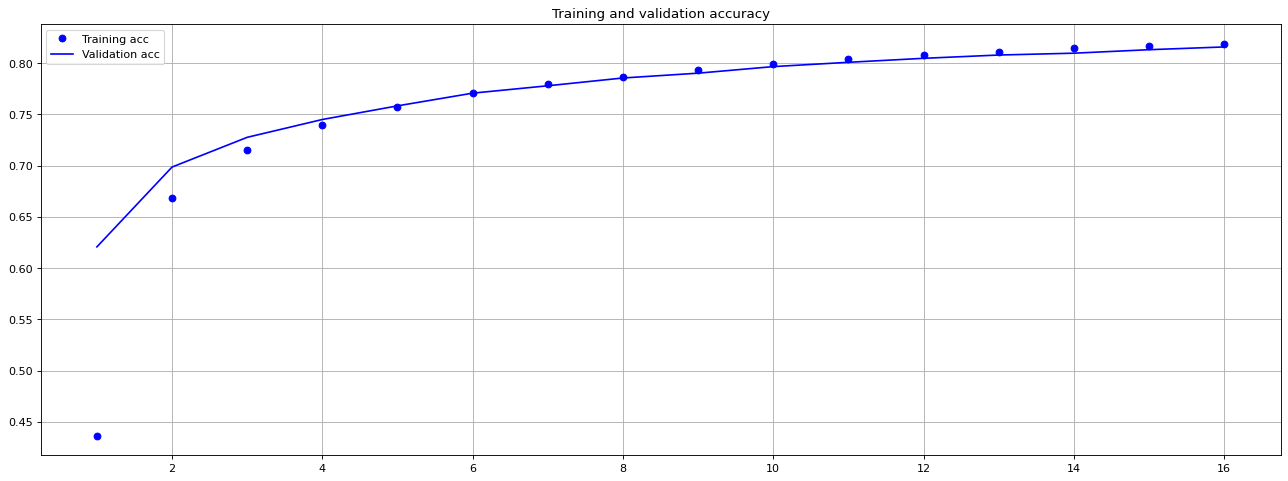

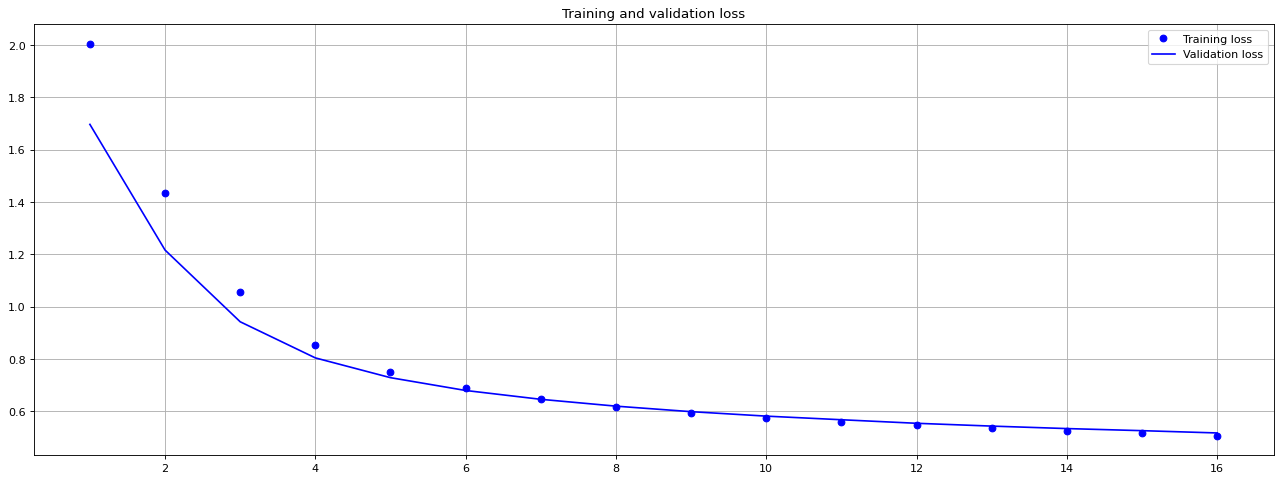

In [371]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

# **Model retraining**

In [372]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [373]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block4_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])

In [374]:
model = models.Sequential([
   conv_base,
   layers.Flatten(input_shape=(28,28)),
   layers.Dense(256, activation="relu"),
   layers.Dense(256, activation="relu"),
   layers.Dense(10, activation="softmax"),
])


model.compile(
    tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [375]:
history = model.fit(
    x_train, y_train,
    epochs=16,
    verbose=1,
    batch_size=256,
    validation_data=(x_test, y_test),
    callbacks=early_stopping
)

Epoch 1/16
235/235 [==============================] - 17s 61ms/step - loss: 0.5356 - accuracy: 0.8099 - val_loss: 0.4775 - val_accuracy: 0.8219
Epoch 2/16
235/235 [==============================] - 14s 60ms/step - loss: 0.3347 - accuracy: 0.8771 - val_loss: 0.3327 - val_accuracy: 0.8799
Epoch 3/16
235/235 [==============================] - 14s 60ms/step - loss: 0.2912 - accuracy: 0.8924 - val_loss: 0.3396 - val_accuracy: 0.8741
Epoch 4/16
235/235 [==============================] - 14s 59ms/step - loss: 0.2634 - accuracy: 0.9029 - val_loss: 0.2980 - val_accuracy: 0.8911
Epoch 5/16
235/235 [==============================] - 15s 62ms/step - loss: 0.2451 - accuracy: 0.9094 - val_loss: 0.2841 - val_accuracy: 0.8960
Epoch 6/16
235/235 [==============================] - 14s 59ms/step - loss: 0.2269 - accuracy: 0.9165 - val_loss: 0.3544 - val_accuracy: 0.8771
Epoch 7/16
235/235 [==============================] - 16s 69ms/step - loss: 0.2146 - accuracy: 0.9210 - val_loss: 0.2555 - val_accuracy:

# **Accuracy**

In [376]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2400 - accuracy: 0.9138


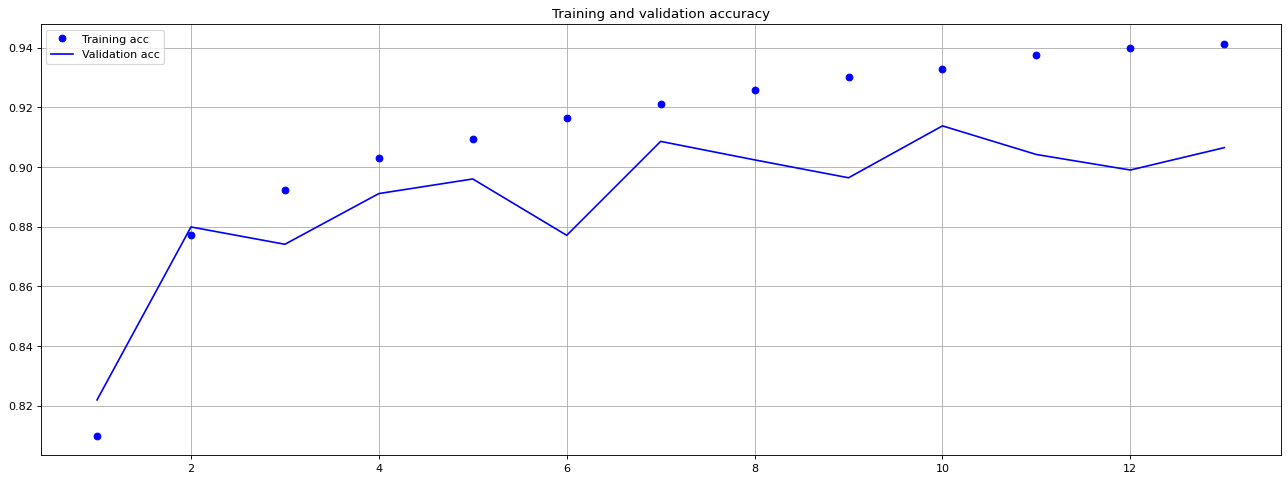

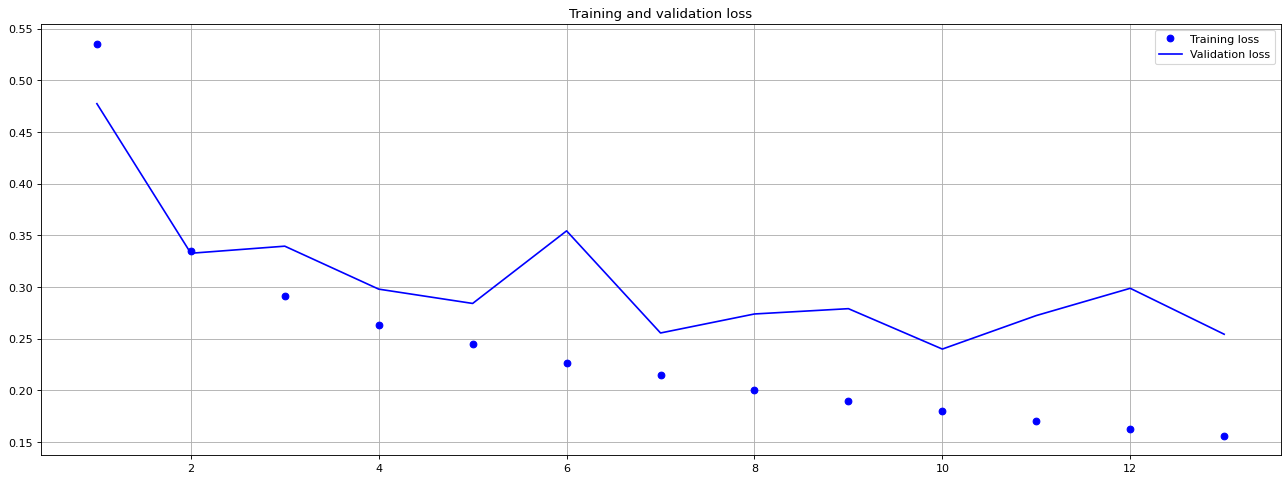

In [377]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

# **Predictions and visualization**

In [378]:
predictions = model.predict(x_test)
predictions.shape
predictions[1]

313/313 [==============================] - 2s 7ms/step


array([3.6171460e-04, 2.0063486e-05, 9.9162525e-01, 1.6953278e-04,
       3.0827525e-03, 2.9361609e-06, 4.7266209e-03, 1.9165802e-06,
       7.0744372e-06, 2.1748854e-06], dtype=float32)

In [379]:
np.argmax(predictions[0])

9

In [380]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[9]

'Ankle boot'

# **Visualization of first 30 predictions**

In [400]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], np.argmax(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], np.argmax(true_label[i])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

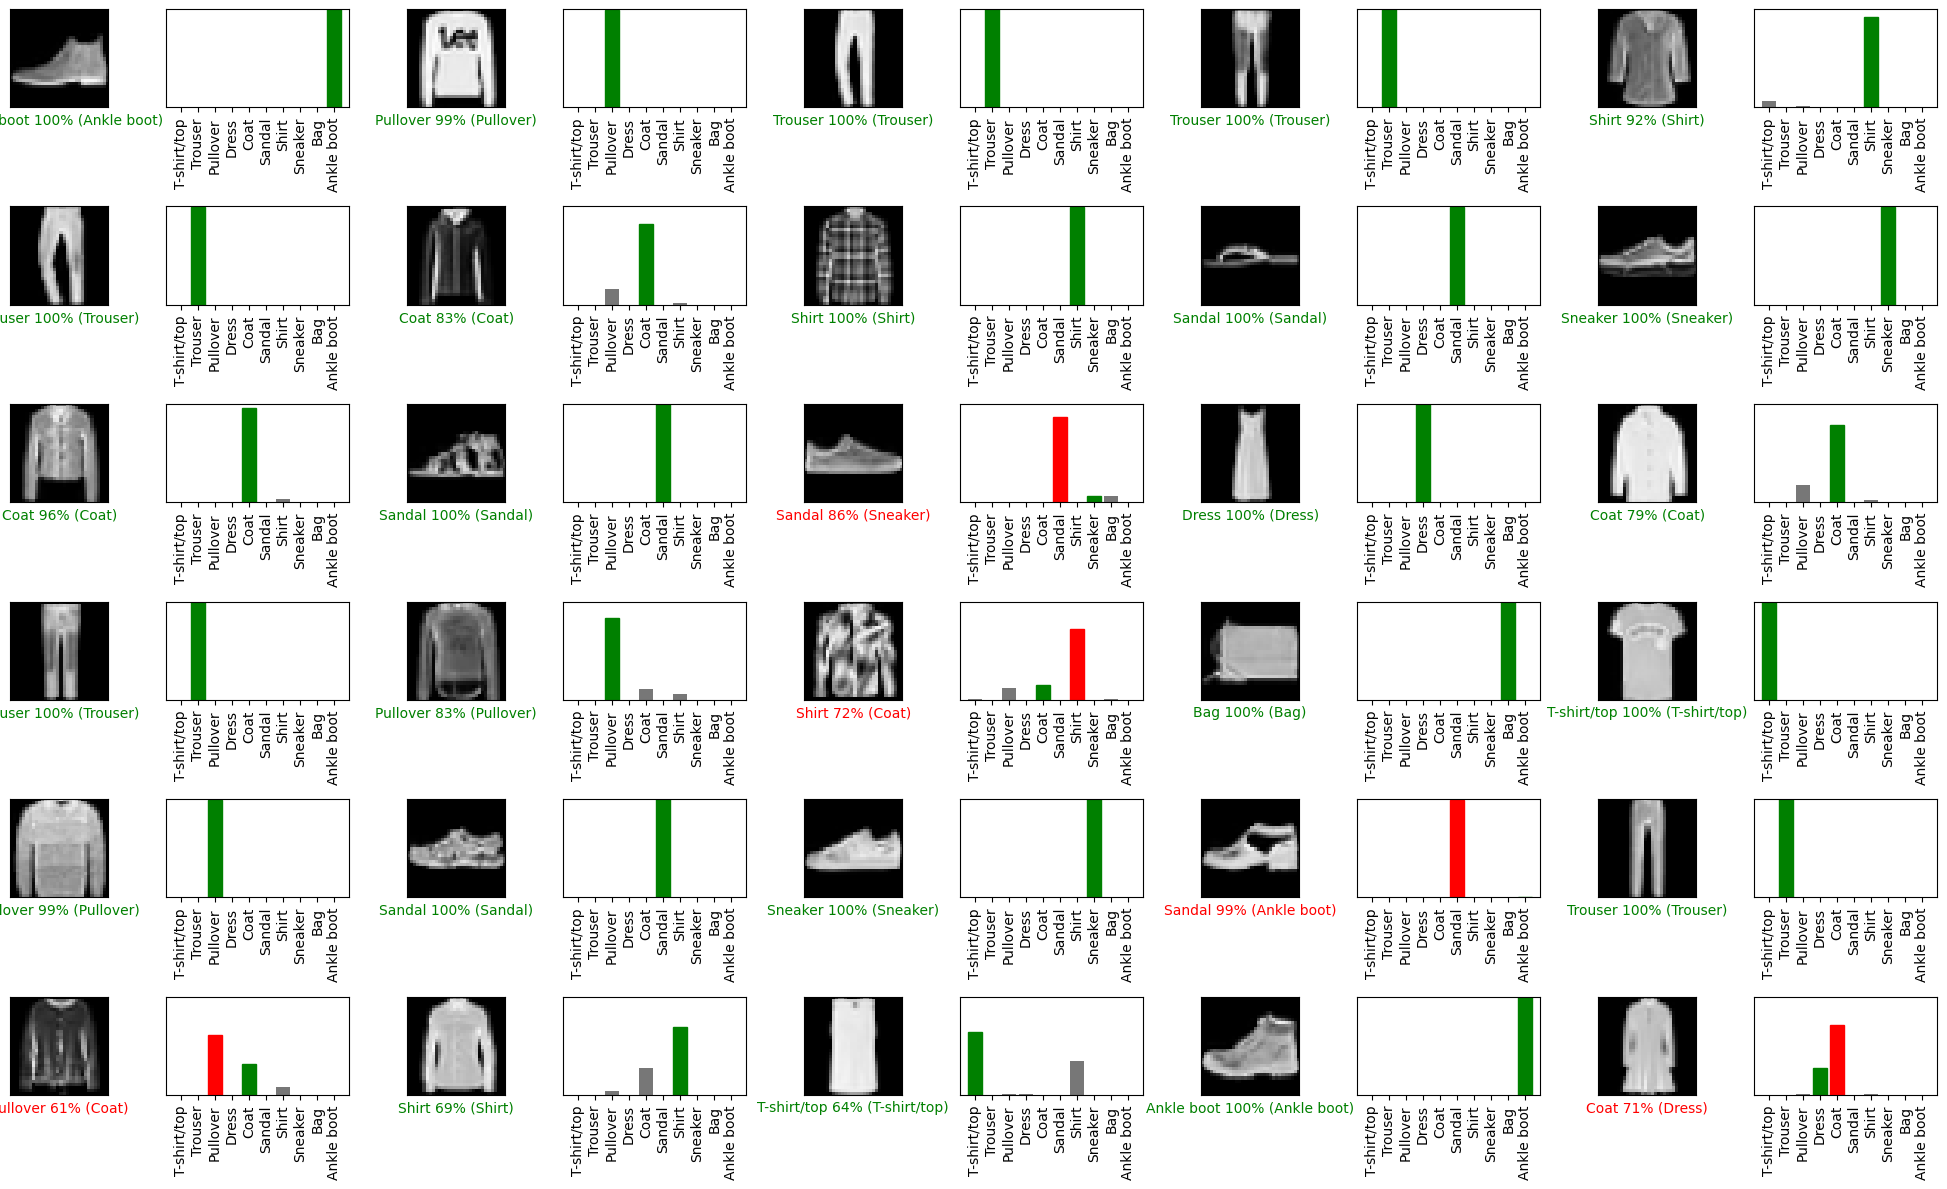

In [402]:
num_rows = 6
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
  _ = plt.xticks(range(10), class_names, rotation=90)
plt.tight_layout()
plt.show()